In [1]:
from pathlib import Path
import pandas as pd
import os

In [2]:
data_path = Path("../data")
print(os.listdir(data_path)) 

['bank-additional-full.csv', 'bank-additional.csv', 'bank-full.csv', 'bank-names.txt', 'bank.csv']


In [3]:
full_data = pd.read_csv("../data/bank-additional-full.csv", sep=";")

In [4]:
full_data.shape

(41188, 21)

In [5]:
full_data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
full_data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Variable Distribution')

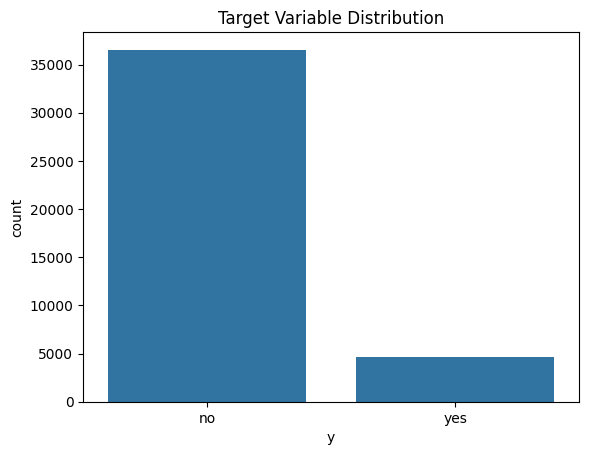

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=full_data)
plt.title('Target Variable Distribution')

In [9]:
full_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
full_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [20]:
full_data.rename(columns={"y": "outcome"}, inplace=True)

In [24]:
full_data['outcome'].unique()

array(['no', 'yes'], dtype=object)

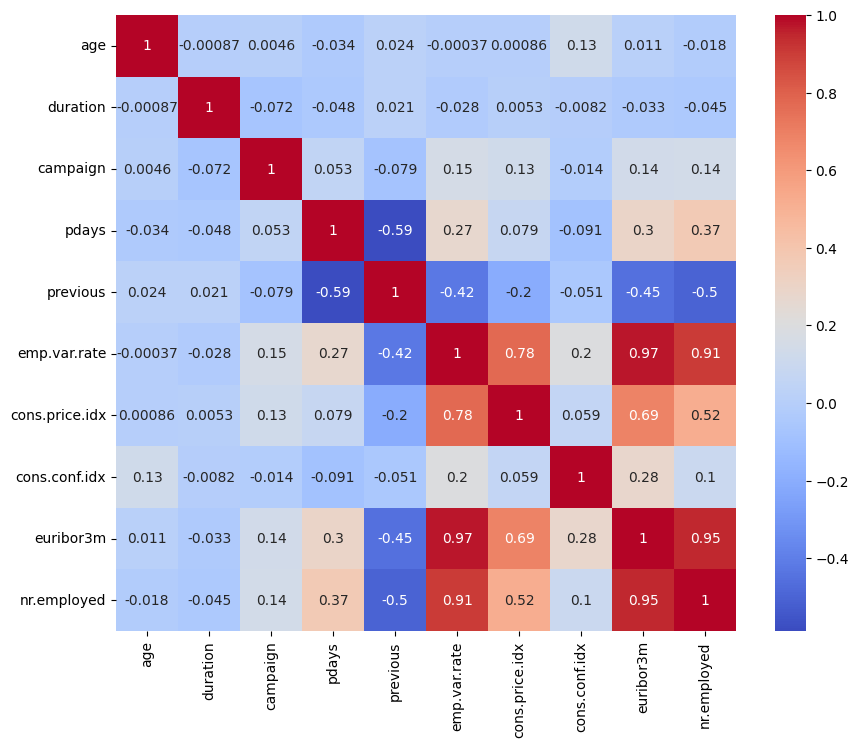

In [13]:
numeric_data = full_data.select_dtypes(include="number")
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
categorical_data = full_data.select_dtypes(exclude="number")

In [16]:
categorical_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [39]:
categorical_data['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [33]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [18]:
categorical_data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [28]:
full_data['outcome'] = full_data['outcome'].map({"no": 0, "yes": 1})

In [29]:
full_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


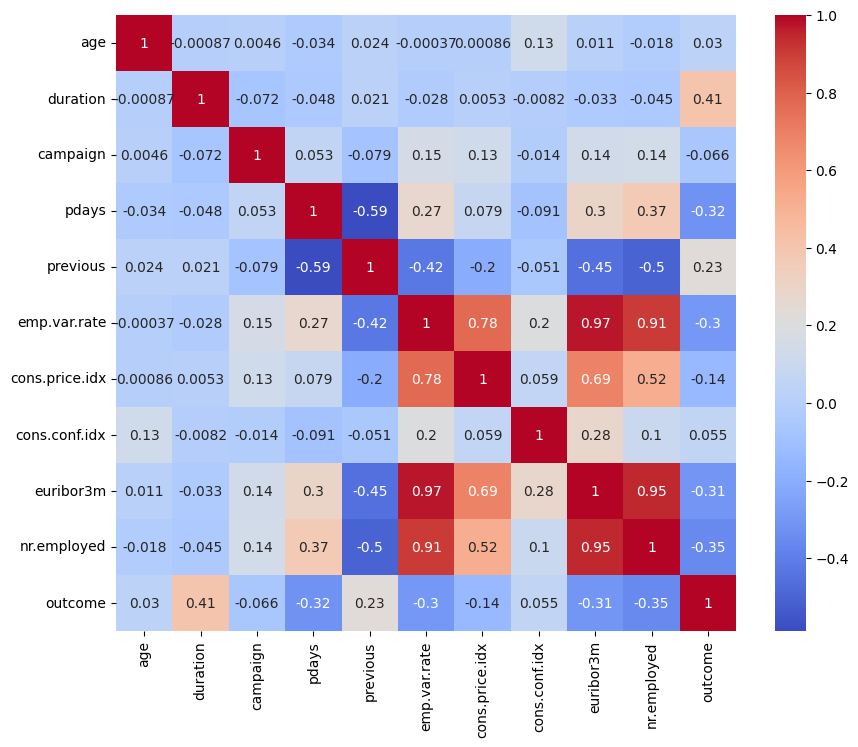

In [30]:
numeric_data = full_data.select_dtypes(include="number")
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [31]:
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [60]:
correlations = numeric_data.corrwith(full_data['outcome'])

In [77]:
num_cor_df=pd.DataFrame(correlations.abs().sort_values(ascending=False))

In [92]:
num_cor_df=num_cor_df.drop("outcome")

In [93]:
selected_num_features = num_cor_df.head(6).index.tolist()

In [94]:
selected_num_features

['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous']

In [32]:
full_data['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

***relationship btn duration and outcome***

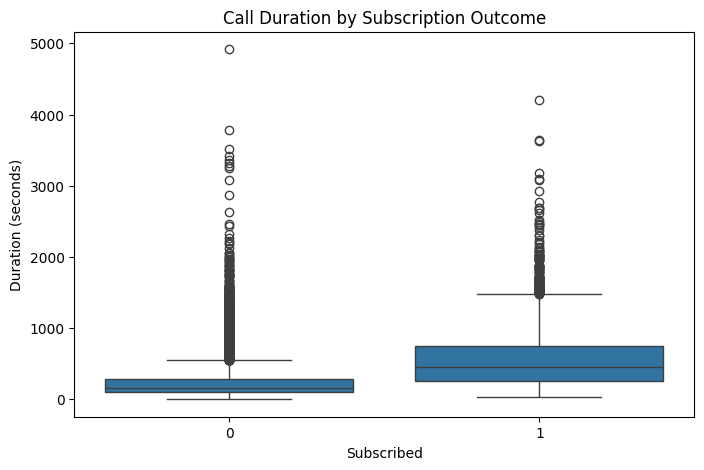

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='outcome', y='duration', data=full_data)
plt.title("Call Duration by Subscription Outcome")
plt.ylabel("Duration (seconds)")
plt.xlabel("Subscribed")
plt.show()

Insights: Longer calls tend to correlate with higher chances of the customer subscribing|

***comparing relationships among categorical data***

In [47]:
full_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
outcome             int64
dtype: object

In [53]:
from scipy.stats import chi2_contingency
chi_relationship= {}

def chi_square_test(df, feature, target='outcome'):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {feature}")
    print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}")
    chi_relationship[feature] = {"chi2": f"{chi2:.2f}", "p_value": f"{p:.4f}"}
    return chi2, p


categorical_features = full_data.select_dtypes(exclude="number")

for feature in categorical_features:
    chi_square_test(full_data, feature)


Feature: job
Chi² = 961.24, p-value = 0.0000
Feature: marital
Chi² = 122.66, p-value = 0.0000
Feature: education
Chi² = 193.11, p-value = 0.0000
Feature: default
Chi² = 406.58, p-value = 0.0000
Feature: housing
Chi² = 5.68, p-value = 0.0583
Feature: loan
Chi² = 1.09, p-value = 0.5787
Feature: contact
Chi² = 862.32, p-value = 0.0000
Feature: month
Chi² = 3101.15, p-value = 0.0000
Feature: day_of_week
Chi² = 26.14, p-value = 0.0000
Feature: poutcome
Chi² = 4230.52, p-value = 0.0000


In [57]:
chi_relationship

{'job': {'chi2': '961.24', 'p_value': '0.0000'},
 'marital': {'chi2': '122.66', 'p_value': '0.0000'},
 'education': {'chi2': '193.11', 'p_value': '0.0000'},
 'default': {'chi2': '406.58', 'p_value': '0.0000'},
 'housing': {'chi2': '5.68', 'p_value': '0.0583'},
 'loan': {'chi2': '1.09', 'p_value': '0.5787'},
 'contact': {'chi2': '862.32', 'p_value': '0.0000'},
 'month': {'chi2': '3101.15', 'p_value': '0.0000'},
 'day_of_week': {'chi2': '26.14', 'p_value': '0.0000'},
 'poutcome': {'chi2': '4230.52', 'p_value': '0.0000'}}

In [82]:
# dropping features with the lowest pvalues 
selected_cat_features = []
for feature, stats in chi_relationship.items():
    p_val = float(stats['p_value'])  
    if p_val < 0.05:
        selected_cat_features.append(feature)

In [83]:
selected_cat_features

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [97]:
num_features_df = full_data[selected_num_features]

In [98]:
num_features_df

,duration,nr.employed,pdays,euribor3m,emp.var.rate,previous
0,261,5191.0,999,4.857,1.1,0
1,149,5191.0,999,4.857,1.1,0
2,226,5191.0,999,4.857,1.1,0
3,151,5191.0,999,4.857,1.1,0
4,307,5191.0,999,4.857,1.1,0
...,...,...,...,...,...,...
41183,334,4963.6,999,1.028,-1.1,0
41184,383,4963.6,999,1.028,-1.1,0
41185,189,4963.6,999,1.028,-1.1,0
41186,442,4963.6,999,1.028,-1.1,0
